In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy

2023-03-26 06:53:34.890357: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
dataframe = pd.read_csv("twitter_posts.csv")

In [3]:
dataframe.head(20)

,Date,Username,longitude,latitude,city,country
0,2023-03-18 16:28:04+00:00,RokebyM,67.997691,6.622513,India',India
1,2023-03-18 11:20:07+00:00,watwijm,94.944302,26.649359,Arunachal Pradesh,India
2,2023-03-18 11:05:10+00:00,travelwitharyan,72.206516,27.698326,Bikaner,India
3,2023-03-18 11:03:32+00:00,travelwitharyan,72.206516,27.698326,Bikaner,India
4,2023-03-18 08:44:42+00:00,NSivapriyan2141,77.312066,8.230492,Padmanabhapuram,India
5,2023-03-17 14:38:59+00:00,tourism_udupi,74.667323,13.086056,Udupi,India
6,2023-03-17 12:05:03+00:00,onsvlogs,85.832496,21.544342,West Bengal,India
7,2023-03-17 07:28:46+00:00,RokebyM,67.997691,6.622513,India',India
8,2023-03-17 02:31:04+00:00,jaydeep_dey03,90.939097,25.722728,Guwahati,India
9,2023-03-16 16:16:44+00:00,flywithheritage,77.882808,30.227984,Dehradun,India


In [4]:
dataframe.shape

(1803, 6)

In [5]:
# dataframe.drop_duplicates(subset='city',keep=False, inplace = True)

In [6]:
dataframe.head(10)

,Date,Username,longitude,latitude,city,country
0,2023-03-18 16:28:04+00:00,RokebyM,67.997691,6.622513,India',India
1,2023-03-18 11:20:07+00:00,watwijm,94.944302,26.649359,Arunachal Pradesh,India
2,2023-03-18 11:05:10+00:00,travelwitharyan,72.206516,27.698326,Bikaner,India
3,2023-03-18 11:03:32+00:00,travelwitharyan,72.206516,27.698326,Bikaner,India
4,2023-03-18 08:44:42+00:00,NSivapriyan2141,77.312066,8.230492,Padmanabhapuram,India
5,2023-03-17 14:38:59+00:00,tourism_udupi,74.667323,13.086056,Udupi,India
6,2023-03-17 12:05:03+00:00,onsvlogs,85.832496,21.544342,West Bengal,India
7,2023-03-17 07:28:46+00:00,RokebyM,67.997691,6.622513,India',India
8,2023-03-17 02:31:04+00:00,jaydeep_dey03,90.939097,25.722728,Guwahati,India
9,2023-03-16 16:16:44+00:00,flywithheritage,77.882808,30.227984,Dehradun,India


In [7]:
dataframe.size

10818

In [8]:
dataframe.shape

(1803, 6)

In [9]:
dataframe = dataframe[dataframe['country'] == 'India']

In [10]:
dataframe.shape

(1759, 6)

In [11]:
from sklearn.cluster import DBSCAN, KMeans
import folium

In [12]:
# dataframe.drop_duplicates(subset='city',keep=False, inplace = True)

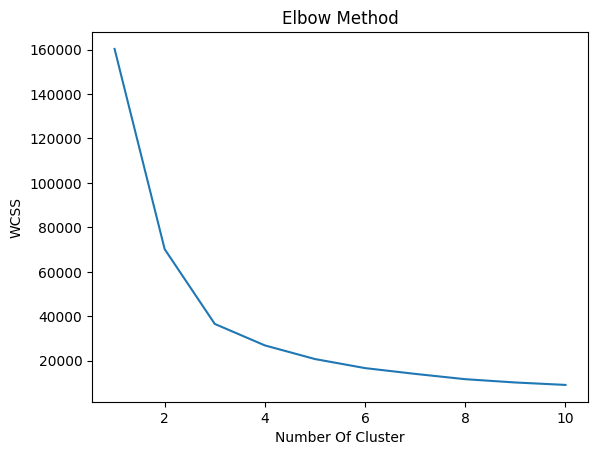

In [13]:
# X = dataframe[['longitude', 'latitude']]

# db = DBSCAN(eps=0.3, min_samples=10)

# db.fit(X)
# dataframe['clusters'] = db.labels_
import matplotlib.pyplot as plt
X = dataframe[['longitude', 'latitude']].values

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number Of Cluster')
plt.ylabel('WCSS')
plt.show()

In [14]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

In [15]:
dataframe['clusters'] = pred_y

In [16]:
dataframe.head(100)

,Date,Username,longitude,latitude,city,country,clusters
0,2023-03-18 16:28:04+00:00,RokebyM,67.997691,6.622513,India',India,1
1,2023-03-18 11:20:07+00:00,watwijm,94.944302,26.649359,Arunachal Pradesh,India,2
2,2023-03-18 11:05:10+00:00,travelwitharyan,72.206516,27.698326,Bikaner,India,3
3,2023-03-18 11:03:32+00:00,travelwitharyan,72.206516,27.698326,Bikaner,India,3
4,2023-03-18 08:44:42+00:00,NSivapriyan2141,77.312066,8.230492,Padmanabhapuram,India,1
...,...,...,...,...,...,...,...
95,2023-02-25 14:05:52+00:00,MANISHK59730146,85.824693,25.659800,Dalsinghsarai,India,2
96,2023-02-25 08:24:49+00:00,Mohitjhasangam,83.324301,24.286947,Bihar,India,2
97,2023-02-25 02:25:28+00:00,travelnaavikaru,77.232154,8.121363,Kalkulam,India,1
98,2023-02-24 15:20:53+00:00,rk_mufc,74.370044,34.044220,Gulmarg,India,0


In [17]:
dataframe['clusters'].max()

3

In [18]:
dataframe['clusters'].max()

3

In [63]:
# # m = folium.Map(location=[dataframe.latitude.mean(), dataframe.longitude.mean()], zoom_start=5)
# from folium import plugins
# from folium.plugins import Search



# colors = ['red', 'green', 'blue', 'purple']

# m = folium.Map(location=[20.5937, 78.9629], zoom_start=4)
# marker_group = folium.FeatureGroup(name='twitter_posts.csv')

# for index, row in dataframe.iterrows():
#     folium.CircleMarker(location=[row['latitude'], row['longitude']], radius=5, color=colors[row['clusters']], popup=row['city']).add_to(marker_group)
    
# marker_group.add_to(m)

# search_template = """
# <form class="form-inline">
#   <div class="form-group mx-sm-3 mb-2">
#     <label for="search-input" class="sr-only">Search</label>
#     <input type="text" class="form-control" id="search-input" placeholder="Search">
#   </div>
#   <button type="button" class="btn btn-primary mb-2" id="search-button">Search</button>
# </form>
# """

# search = Search(layer=marker_group,
#                 search_label='city',
#                 geom_type='Point',
#                 popup_on_found=True,
#                 collapsed=True,
#                 control=False,
#                 show=False,
#                search_options={'case_sensitive': False, 'operator': 'or'},
#                template=search_template,
#                search_zoom=10,
#                 search_opacity=0.7)

# def search_city(query, data):
#     print('Searching for:', query)
#     result = data[dataframe['city'].str.contains(query, case=False)]
#     print('Result:', result)
#     if len(result) > 0:
#         return result.iloc[0]['latitude'], result.iloc[0]['longitude']
#     else:
#         return None
# search.search = search_city
# # search.layer = m
# m.add_child(search)



# # for index, row in dataframe.iterrows():
# #     folium.Marker([row['latitude'], row['longitude']]).add_to(m)

# # for lat, lon, cluster,city in zip(dataframe['latitude'], dataframe['longitude'], dataframe['clusters'],dataframe['city']):
    
# #     folium.Marker(location=[lat,lon], icon=folium.Icon(icon='glyphicon-plane', color=colors[cluster]), popup=city ).add_to(m)


# m.save('twitter_new.html')






# m = folium.Map(location=[dataframe.latitude.mean(), dataframe.longitude.mean()], zoom_start=5)
# colors = ['red', 'green', 'blue', 'purple']

# for lat, lon, cluster,city in zip(dataframe['latitude'], dataframe['longitude'], dataframe['clusters'],dataframe['city']):
    
#     folium.Marker(location=[lat,lon], icon=folium.Icon(icon='glyphicon-plane', color=colors[cluster]), popup=city ).add_to(m)


# m.save('twitter_clusters.html')

In [ ]:
 m = folium.Map(location=[dataframe.latitude.mean(), dataframe.longitude.mean()], zoom_start=5)
colors = ['red', 'green', 'blue', 'purple']

for lat, lon, cluster,city in zip(dataframe['latitude'], dataframe['longitude'], dataframe['clusters'],dataframe['city']):
    
    folium.Marker(location=[lat,lon], icon=folium.Icon(icon='glyphicon-plane', color=colors[cluster]), popup=city ).add_to(m)


m.save('twitter_clusters.html')

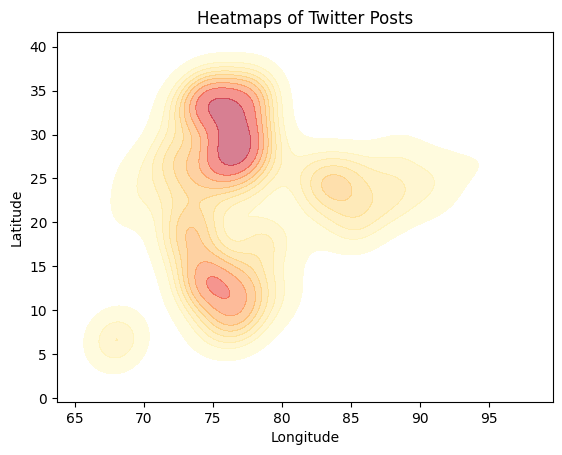

In [22]:
import seaborn as sns
sns.kdeplot(data=dataframe,x='longitude', y='latitude', cmap='YlOrRd',fill=True, alpha=0.5)

plt.title('Heatmaps of Twitter Posts')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()